In [1]:
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv("alturas.csv")


Coeficientes: 
 [0.51400591]
Término independiente (corte de la recta en eje Y): 
 86.08771337328062
Error Cuadrático Medio (MCE): 38.28 cms²
Raiz Error Cuadrático Medio (RMCE): 6.19 cms


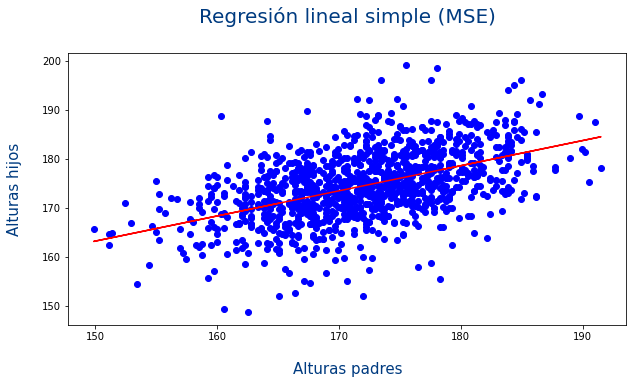

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

X = np.array(df.Father).reshape((-1, 1))
Y = np.array(df.Son)

modelo = LinearRegression()

modelo.fit(X, Y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes: \n', modelo.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Término independiente (corte de la recta en eje Y): \n', modelo.intercept_)

figure=plt.figure(figsize=(10, 5))
axis = figure.add_subplot()

# Las etiquetas
axis.set_xlabel('Alturas padres', fontsize=15,labelpad=20,color="#003B80")  
axis.set_ylabel('Alturas hijos', fontsize=15,labelpad=20,color="#003B80")
axis.set_title("Regresión lineal simple (MSE)", fontsize=20,pad=30,color="#003B80")

# X = df.Father
Y = df.Father.apply(lambda x: modelo.predict(np.array(x).reshape(-1, 1)))

# Los datos que se muestran
axis.plot(df.Father, df.Son,"o",color = "#0000FF", zorder = 1)
# axis.plot(df.Father, modelo.predict(X), color = "#FF0000", zorder = 2)
axis.plot(df.Father, Y, color = "#FF0000", zorder = 2)

# Error Cuadrado Medio
error_ECM = mean_squared_error(df.Son, Y)
print("Error Cuadrático Medio (MCE): %.2f cms²" % error_ECM)
print("Raiz Error Cuadrático Medio (RMCE): %.2f cms" % np.sqrt(error_ECM))
